In [1]:
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
my_package = "C:\\Users\\welcome\\Desktop\\MyFuncs"
imp_mods = joblib.os.sys.path

if my_package not in imp_mods:
    imp_mods.append(my_package)
    print("Package imported successfully!")

Package imported successfully!


In [3]:
import myio_funcs as mf

## CLEANING & PREPROCESSING OF DATAFRAMES

### 1. Fix Datatypes of Dataframe Features 

#### Transactions dataframe

In [4]:
pth = 'W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets'
transdf_loc = '{}\\KPMG-all-transactions-dataframe.joblib'.format(pth)
custsdf_loc = f"{pth}\\KPMG-existing-customers-dataframe.joblib"
new_custsdf_loc = f"{pth}\\KPMG-new-customer-list-dataframe.joblib"

In [5]:
trans = joblib.load(transdf_loc)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02 00:00:00
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03 00:00:00
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20 00:00:00
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-16 00:00:00
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,2015-08-10 00:00:00


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [7]:
trans['customer_id'] = trans['customer_id'].astype(np.int64)
trans['transaction_id'] = trans['transaction_id'].astype(np.int64)
trans['product_id'] = trans['product_id'].astype(np.int64)
trans['list_price'] = trans['list_price'].astype(np.float64)

#### Convert transaction_date feature from object datatype to datetime format

In [8]:
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], yearfirst=True)
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], yearfirst=True)

In [9]:
trans['trans_week_day'] = trans['transaction_date'].dt.day_name()
trans['trans_day_num'] = trans['transaction_date'].dt.day
trans['trans_month_num'] = trans['transaction_date'].dt.month
trans['trans_month'] = trans['transaction_date'].dt.month_name()
trans['trans_year'] = trans['transaction_date'].dt.year

In [10]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-16,Thursday,31,8,August,2017
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [11]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  object        
 12  product_first_sold_date  19803 n

In [12]:
# Save updated trans dataframe to disk
joblib.dump(trans, transdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-all-transactions-dataframe.joblib']

#### Customers dataframe

In [13]:
custs = joblib.load(custsdf_loc)
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4


In [14]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [15]:
custs['customer_id'] = custs['customer_id'].astype(np.int64)
custs['past_3_years_bike_related_purchases'] = custs['past_3_years_bike_related_purchases'].astype(np.int64)
custs['DOB'] = custs['DOB'].astype(np.datetime64)

#### WHEN CONVERTING FEATURES TO NUMERIC DATATYPE: 
<b>customer_id, past_3_years_bike_related_purchases features</b><br>
<b>NOTE:</b><br>
    To successfully convert a column of object datatype into a numeric datatype, <br>
    <b>there must be no null values present in the column/series.</b>

In [16]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [17]:
# save updated version of existing customers dataframe
joblib.dump(custs, custsdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-existing-customers-dataframe.joblib']

#### New Customers dataframe

In [18]:
print([file for file in joblib.os.listdir(pth) if file.endswith('joblib')])

['KPMG-all-transactions-dataframe.joblib', 'KPMG-existing-customers-dataframe.joblib', 'KPMG-living-customers-transactions.joblib', 'KPMG-new-customer-list-dataframe.joblib']


In [19]:
new_custs = joblib.load(new_custsdf_loc)
new_custs.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [20]:
new_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 no

In [21]:
new_custs['DOB'] = new_custs['DOB'].astype(np.datetime64)
new_custs['tenure'] = new_custs['tenure'].astype(np.int64)
new_custs['property_valuation'] = new_custs['property_valuation'].astype(np.int64)
new_custs['Rank'] = new_custs['Rank'].astype(np.int64)
new_custs['Value'] = new_custs['Value'].astype(np.float64)

In [22]:
new_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   object        
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [23]:
# save updated version of new customers dataframe
joblib.dump(new_custs, new_custsdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-new-customer-list-dataframe.joblib']

### 2. REMOVE ALL REDUNDANT FEATURES

#### Transactions dataframe

In [24]:
trans = joblib.load(transdf_loc)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-16,Thursday,31,8,August,2017
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [25]:
# check for where unique = 1
trans.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
transaction_id,20000.0,NaN,NaN,NaN,10000.5,1.0,5000.75,10000.5,15000.25,20000.0,5773.647028
product_id,20000.0,NaN,NaN,NaN,45.36465,0.0,18.0,44.0,72.0,100.0,30.75359
customer_id,20000.0,NaN,NaN,NaN,1738.24605,1.0,857.75,1736.0,2613.0,5034.0,1011.951046
transaction_date,20000,NaN,NaN,NaN,2017-07-01 14:08:05.280000,2017-01-01 00:00:00,2017-04-01 00:00:00,2017-07-03 00:00:00,2017-10-02 00:00:00,2017-12-30 00:00:00,NaN
online_order,19640,2,True,9829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,20000,2,Approved,19821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,19803,6,Solex,4253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_line,19803,4,Standard,14176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_class,19803,3,medium,13826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_size,19803,3,medium,12990,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  object        
 12  product_first_sold_date  19803 n

In [27]:
# approved_trans = trans.loc[trans['order_status'] == 'Approved'].drop(labels='order_status', axis=1)
# cancelled_trans = trans.loc[trans['order_status'] != 'Approved'].drop(labels='order_status', axis=1)

#### Existing customers dataframe

In [28]:
custs = joblib.load(custsdf_loc)
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4


In [29]:
custs.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
customer_id,4000.0,NaN,NaN,NaN,2000.5,1.0,1000.75,2000.5,3000.25,4000.0,1154.844867
first_name,4000,3139,Timmie,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,3875,3725,Ramsdell,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,4000,6,Female,2037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
past_3_years_bike_related_purchases,4000.0,NaN,NaN,NaN,48.89,0.0,24.0,48.0,73.0,99.0,28.715005
DOB,3913,NaN,NaN,NaN,1977-07-12 23:56:41.277792,1843-12-21 00:00:00,1968-01-22 00:00:00,1977-07-22 00:00:00,1987-02-28 00:00:00,2002-03-11 00:00:00,NaN
job_title,3494,195,Business Systems Development Analyst,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_industry_category,3344,9,Manufacturing,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wealth_segment,4000,3,Mass Customer,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deceased_indicator,4000,2,N,3998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# living_custs = custs.loc[custs['deceased_indicator'] != 'Y']
# living_custs

#### Remove 'default' and 'country' features

In [31]:
custs = custs.drop(labels='default', axis=1).drop(labels='country', axis=1)
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,New South Wales,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211,QLD,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,New South Wales,4


In [32]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [33]:
# save updated version of existing customers dataframe
joblib.dump(custs, custsdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-existing-customers-dataframe.joblib']

#### New customers dataframe

In [34]:
new_custs = joblib.load(new_custsdf_loc)
new_custs.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [35]:
new_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   object        
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [36]:
# check for where unique = 1
new_custs.describe(include='all', datetime_is_numeric=True).transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
,,,,,,,,,,,
first_name,1000,940,Mandie,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,971,961,Van den Velde,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1000,3,Female,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
past_3_years_bike_related_purchases,1000,100,60,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,983,NaN,NaN,NaN,1971-04-20 14:05:14.954221768,1938-06-08 00:00:00,1957-10-09 00:00:00,1972-03-24 00:00:00,1983-04-12 12:00:00,2002-02-27 00:00:00,NaN
job_title,894,184,Associate Professor,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_industry_category,835,9,Financial Services,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wealth_segment,1000,3,Mass Customer,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deceased_indicator,1000,1,N,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
new_custs = new_custs.drop('country', axis=1)

In [38]:
# save updated version of new customers to disk
joblib.dump(new_custs, new_custsdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-new-customer-list-dataframe.joblib']

### 3. DATA CONSISTENCY

#### Transactions dataframe

In [39]:
trans = joblib.load(transdf_loc)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-16,Thursday,31,8,August,2017
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [40]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  object        
 12  product_first_sold_date  19803 n

#### Existing customer dataframe

In [41]:
custs = joblib.load(custsdf_loc)
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,New South Wales,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211,QLD,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,New South Wales,4


In [42]:
custs['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [43]:
# fix the gender column to have consistent range of values
custs.loc[ (custs['gender'] == 'F') | (custs['gender'] == 'Femal'), ['gender'] ] = 'Female'
custs.loc[ (custs['gender'] == 'M'), ['gender'] ] = 'Male'
custs.loc[ (custs['gender'] == 'U'), ['gender'] ] = 'Unknown'

In [44]:
custs['gender'].value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [45]:
custs['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [46]:
# fix the deceased_indicator column to have 'Yes' and 'No'
# consistent with similar features like own_car column
custs['deceased_indicator'] =  custs['deceased_indicator'].str.replace('Y', 'Yes').str.replace('N', 'No')

In [47]:
custs['deceased_indicator'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
custs['state'].unique()

array(['New South Wales', nan, 'QLD', 'VIC', 'NSW', 'Victoria'],
      dtype=object)

In [49]:
# fix state values to be given in full 
# no abbreviations is allowed
custs['state'] = custs['state'].str.replace('QLD', 'Queensland').str.replace('VIC', 'Victoria').str.replace('NSW', 'New South Wales')

In [50]:
custs['state'].unique()

array(['New South Wales', nan, 'Queensland', 'Victoria'], dtype=object)

In [51]:
custs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11,060 Morning Avenue,2016,New South Wales,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16,6 Meadow Vale Court,2153,New South Wales,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,No,Yes,15,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,No,7,0 Holy Cross Court,4211,Queensland,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,Yes,8,17979 Del Mar Point,2448,New South Wales,4


In [52]:
# save updated version of existing customers dataframe to disk
joblib.dump(custs, custsdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-existing-customers-dataframe.joblib']

#### New Customers dataframe

In [53]:
new_custs = joblib.load(new_custsdf_loc)
new_custs.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,9,4,1.703125


In [54]:
new_custs['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [55]:
new_custs['gender'] = new_custs['gender'].str.replace('U', 'Unknown')

In [56]:
new_custs['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [57]:
new_custs['deceased_indicator'].unique()

array(['N'], dtype=object)

In [58]:
new_custs['deceased_indicator'] = new_custs['deceased_indicator'].str.replace('N', "No")

In [59]:
new_custs['deceased_indicator'].unique()

array(['No'], dtype=object)

In [60]:
new_custs['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [61]:
new_custs['state'] = new_custs['state'].str.replace('QLD', 'Queensland').str.replace('VIC', 'Victoria').str.replace('NSW', 'New South Wales')

In [62]:
new_custs['state'].unique()

array(['Queensland', 'New South Wales', 'Victoria'], dtype=object)

In [63]:
new_custs.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,No,Yes,14,45 Shopko Center,4500,Queensland,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,No,16,14 Mccormick Park,2113,New South Wales,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,No,10,5 Colorado Crossing,3505,Victoria,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,No,Yes,5,207 Annamark Plaza,4814,Queensland,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,No,19,115 Montana Place,2093,New South Wales,9,4,1.703125


In [64]:
# save updated version of new customers dataframe to disk
joblib.dump(new_custs, new_custsdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-new-customer-list-dataframe.joblib']

### CREATE NEW DATAFRAME FOR  THE APPROVED TRANSACTIONS OF ONLY LIVING CUSTOMERS

In [65]:
trans, custs = joblib.load(transdf_loc), joblib.load(custsdf_loc)

In [66]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  object        
 12  product_first_sold_date  19803 n

<AxesSubplot:ylabel='order_status'>

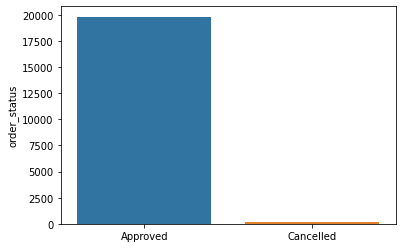

In [67]:
ords = trans['order_status'].value_counts()
sns.barplot(x=ords.index, y=ords)
# plt.ylim(top=3000)

In [68]:
approved_trans = trans.loc[trans['order_status'] == 'Approved']

In [69]:
# Now drop the order_status column
# because dataframe now contains only approved orders
approved_trans = approved_trans.drop(labels='order_status', axis=1)
approved_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
1,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
3,4,88,3135,2017-08-31,False,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-16,Thursday,31,8,August,2017
4,5,78,787,2017-10-01,True,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [70]:
approved_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19467 non-null  object        
 5   brand                    19625 non-null  object        
 6   product_line             19625 non-null  object        
 7   product_class            19625 non-null  object        
 8   product_size             19625 non-null  object        
 9   list_price               19821 non-null  float64       
 10  standard_cost            19625 non-null  object        
 11  product_first_sold_date  19625 non-null  datetime64[ns]
 12  trans_week_day           19821 n

In [71]:
custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

(Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Count of living customers'))

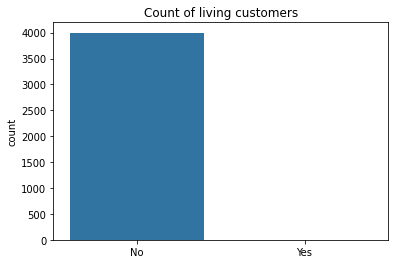

In [72]:
sns.barplot(x=custs['deceased_indicator'].value_counts().index, y=custs['deceased_indicator'].value_counts())
plt.ylabel('count'), plt.title('Count of living customers')

In [73]:
# remove the deceased_indicator feature since 
# we are dealing with only living customers
living_custs = custs.loc[custs['deceased_indicator'] == 'No'].drop('deceased_indicator', axis=1)
living_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3873 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3911 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3342 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   owns_car                             3998 non-null   object        
 10  tenure      

#### COMBINE APPROVED TRANSACTIIONS DF AND LIVING CUSTOMERS DF AT CUSTOMER_ID

In [77]:
cust_trans = pd.merge(approved_trans, living_custs, how='inner', on=['customer_id']).sort_values(['transaction_id'])
cust_trans = cust_trans.reset_index().drop('index', axis=1)
cust_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
1,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,...,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10,4 Shopko Circle,2196,New South Wales,5
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,1793.43,...,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22,586 Miller Parkway,2835,New South Wales,1
3,4,88,3135,2017-08-31,False,Norco Bicycles,Standard,medium,medium,1198.46,...,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16,1617 Harper Parkway,2096,New South Wales,10
4,5,78,787,2017-10-01,True,Giant Bicycles,Standard,medium,large,1765.30,...,1996-12-15,NaN,Retail,Affluent Customer,Yes,2,0601 Stephen Place,2292,New South Wales,7


#### Check for presence of duplicate transactions

In [78]:
cust_trans.loc[cust_trans['transaction_id'].duplicated()]

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation


In [80]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19810 entries, 0 to 19809
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19810 non-null  int64         
 1   product_id                           19810 non-null  int64         
 2   customer_id                          19810 non-null  int64         
 3   transaction_date                     19810 non-null  datetime64[ns]
 4   online_order                         19456 non-null  object        
 5   brand                                19614 non-null  object        
 6   product_line                         19614 non-null  object        
 7   product_class                        19614 non-null  object        
 8   product_size                         19614 non-null  object        
 9   list_price                           19810 non-null  float64       
 10  standard_c

#### Save updated version of dataframe object to disk

In [26]:
cust_transdf_loc = f"{pth}\\KPMG-living-customers-transactions.joblib"

In [20]:
joblib.dump(cust_trans, cust_transdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\living-customers-transactions.joblib']

In [ ]:
stop here

In [21]:
import shutil

In [22]:
pth = "C:\\Users\\welcome\\Documents\\Data science"
sf = mf.file_search(pth, 'KPMG', 'ipynb')
sf.keys()

dict_keys(['KPMG.ipynb', 'KPMG-checkpoint.ipynb', 'KPMG-data-cleaning-and-preprocessing-1.ipynb', 'KPMG-data-cleaning-and-preprocessing.ipynb', 'KPMG-Data-Cleaning-Dataframe-Structuring.ipynb', 'KPMG-ML-model.ipynb', 'KPMG-visualization-analysis.ipynb', 'KPMG-data-cleaning-and-preprocessing-1-checkpoint.ipynb', 'KPMG-data-cleaning-and-preprocessing-checkpoint.ipynb', 'KPMG-Data-Cleaning-Dataframe-Structuring-checkpoint.ipynb', 'KPMG-ML-model-checkpoint.ipynb', 'KPMG-visualization-analysis-checkpoint.ipynb'])

In [23]:
dest = "W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\"
shutil.copy(src=sf['KPMG-data-cleaning-and-preprocessing-1.ipynb'], dst=dest)

'W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-data-cleaning-and-preprocessing-1.ipynb'

#### Checking the saved dataframe object

In [27]:
# pth = 'C:\\Users\\welcome\\Documents\\Data science'
pth = "W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\"
sf = mf.file_search(pth, 'KPMG', 'joblib')
sf.keys()

dict_keys(['KPMG-all-transactions-dataframe.joblib', 'KPMG-all-transactions.joblib', 'KPMG-existing-customers-dataframe.joblib', 'KPMG-living-customers-transactions.joblib', 'KPMG-new-customer-list-dataframe.joblib'])

In [28]:
df = joblib.load(sf['KPMG-living-customers-transactions.joblib'])
print(df.columns)
df.head()

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment', 'owns_car',
       'tenure', 'address', 'postcode', 'state', 'property_valuation'],
      dtype='object')


,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
1,11065,1,2950,2017-10-16,False,Giant Bicycles,Standard,medium,medium,1403.50,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
2,18923,62,2950,2017-04-26,False,Solex,Standard,medium,medium,478.16,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
3,11065,1,2950,2017-10-16,False,Giant Bicycles,Standard,medium,medium,1403.50,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
4,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,...,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10,4 Shopko Circle,2196,New South Wales,5


In [ ]:
print([var for var in globals() if not var.startswith("_")])

<b> --- The End --- </b>